In [1]:
import pandas as pd # it is used for dataframe and series
import numpy as np #it is used for numeric funtions
import matplotlib.pyplot as plt  # it is also data visualization library
import seaborn as sns # it is data visualization library on top of the matplotlib
import os # it is operating system it is used to call the file in the device
from sklearn.cluster import KMeans # it is  machine learning algorithms for clustering and evaluation
from sklearn.metrics import silhouette_score # it is used for  metric to measure clustering quality
from sklearn.model_selection import train_test_split # it is used to the function to split data into training and testing sets
from sklearn.linear_model import LinearRegression # it is linear regression model for predictive modeling
from sklearn.preprocessing import StandardScaler # it is  scaler to normalize data features
from sklearn.metrics import mean_squared_error, r2_score # it is used to measure the  metrics to evaluate regression model performance
import warnings #  it is Used for handle system warnings
os.chdir('C:\\Users\\marag\\OneDrive\\Desktop') # this is the directory where the file location
df = pd.read_csv('SongDetails.csv') 
print(df)

      Unnamed: 0  duration_ms  explicit  year  popularity  danceability  \
0              0       211160     False  2000          77         0.751   
1              1       167066     False  1999          79         0.434   
2              2       250546     False  1999          66         0.529   
3              3       224493     False  2000          78         0.551   
4              4       200560     False  2000          65         0.614   
...          ...          ...       ...   ...         ...           ...   
1995        1995       181026     False  2019          79         0.842   
1996        1996       178426     False  2019          78         0.552   
1997        1997       200593     False  2019          69         0.847   
1998        1998       171029     False  2019          75         0.741   
1999        1999       215280     False  2019          85         0.695   

      energy  key  loudness  mode  ...  World/Traditional  classical  country  \
0      0.834    1 

In [2]:
df.duplicated().any() # It is used to check any duplicate values

False

In [13]:
df.drop_duplicates() # It is used to remove  the duplicate from the table

,Unnamed: 0,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,...,World/Traditional,classical,country,R&B,blues,pop,jazz,hip hop,set(),easy listening
0,0,211160,False,2000,77,0.751,0.834,1,-5.444,0,...,0,0,0,0,0,1,0,0,0,0
1,1,167066,False,1999,79,0.434,0.897,0,-4.918,1,...,0,0,0,0,0,1,0,0,0,0
2,2,250546,False,1999,66,0.529,0.496,7,-9.007,1,...,0,0,1,0,0,1,0,0,0,0
3,3,224493,False,2000,78,0.551,0.913,0,-4.063,0,...,0,0,0,0,0,0,0,0,0,0
4,4,200560,False,2000,65,0.614,0.928,8,-4.806,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,181026,False,2019,79,0.842,0.734,1,-5.065,0,...,0,0,0,0,0,1,0,0,0,0
1996,1996,178426,False,2019,78,0.552,0.702,9,-5.707,1,...,0,0,0,0,0,1,0,0,0,0
1997,1997,200593,False,2019,69,0.847,0.678,9,-8.635,1,...,0,0,1,0,0,0,0,1,0,0
1998,1998,171029,False,2019,75,0.741,0.520,8,-7.513,1,...,0,0,0,0,0,1,0,0,0,0


In [4]:
df.info() # it is the information about dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   duration_ms        2000 non-null   int64  
 2   explicit           2000 non-null   bool   
 3   year               2000 non-null   int64  
 4   popularity         2000 non-null   int64  
 5   danceability       2000 non-null   float64
 6   energy             2000 non-null   float64
 7   key                2000 non-null   int64  
 8   loudness           2000 non-null   float64
 9   mode               2000 non-null   int64  
 10  speechiness        2000 non-null   float64
 11  acousticness       2000 non-null   float64
 12  instrumentalness   2000 non-null   float64
 13  liveness           2000 non-null   float64
 14  valence            2000 non-null   float64
 15  tempo              2000 non-null   float64
 16  latin              2000 

In [5]:
df.isnull().sum() # checking for the null values

Unnamed: 0           0
duration_ms          0
explicit             0
year                 0
popularity           0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
latin                0
rock                 0
Dance/Electronic     0
metal                0
Folk/Acoustic        0
World/Traditional    0
classical            0
country              0
R&B                  0
blues                0
pop                  0
jazz                 0
hip hop              0
set()                0
easy listening       0
dtype: int64

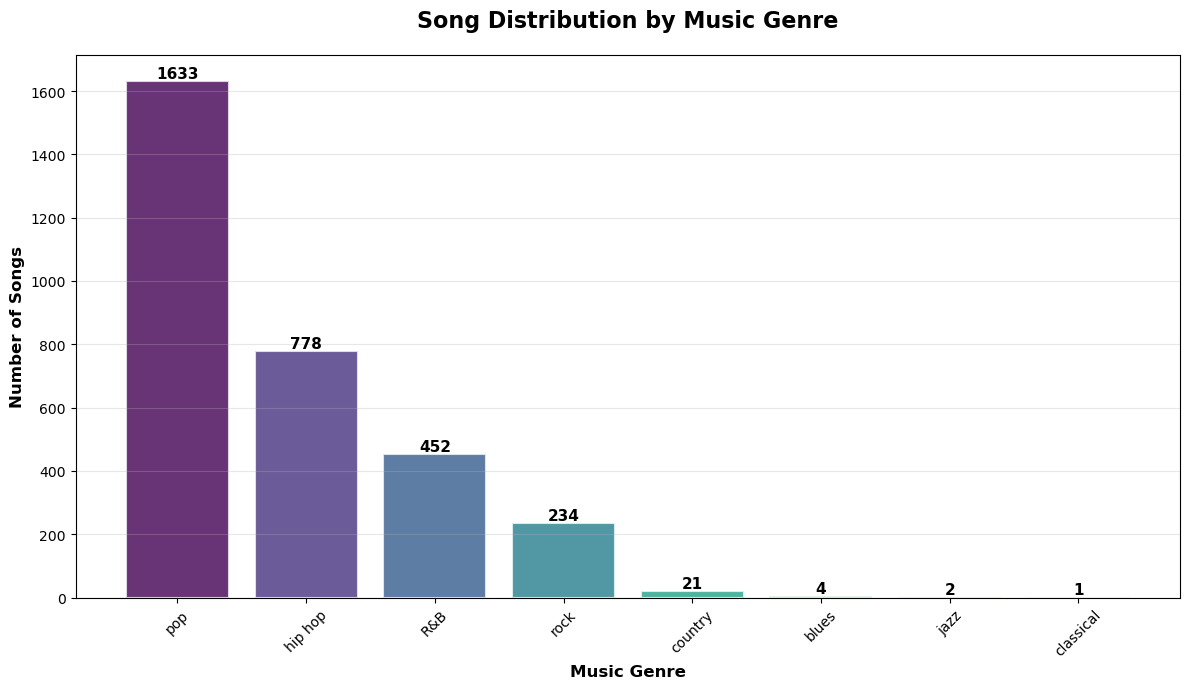

In [5]:
def genre_bar_graph(df):
    """
    Create a bar graph showing the distribution of songs across different genres.
    """
    
    # =========================================================================
    # STEP 1: DEFINE GENRES
    # =========================================================================
    genres = ['pop', 'rock', 'hip hop', 'country', 
              'jazz', 'blues', 'R&B', 'classical']
    
    # =========================================================================
    # STEP 2: CALCULATE GENRE COUNTS
    # =========================================================================
    genre_counts = df[genres].sum().sort_values(ascending=False)
    
    # =========================================================================
    # STEP 3: CREATE COLOR SCHEME
    # =========================================================================
    # Use viridis color scheme
    colors = plt.cm.viridis(np.linspace(0, 1, len(genre_counts)))
    
    # =========================================================================
    # STEP 4: CREATE BAR GRAPH
    # =========================================================================
    plt.figure(figsize=(12, 7))
    
    bars = plt.bar(
        genre_counts.index, 
        genre_counts.values, 
        color=colors, 
        edgecolor='white', 
        linewidth=1.5, 
        alpha=0.8
    )
    
    # =========================================================================
    # STEP 5: ADD CHART LABELS AND TITLES
    # =========================================================================
    plt.title('Song Distribution by Music Genre', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Music Genre', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Songs', fontsize=12, fontweight='bold')
    
    # =========================================================================
    # STEP 6: ADD VALUE LABELS ON BARS
    # =========================================================================
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2., 
            height,
            f'{int(height)}', 
            ha='center', 
            va='bottom', 
            fontweight='bold', 
            fontsize=11
        )
    
    # =========================================================================
    # STEP 7: ADD VISUAL ENHANCEMENTS
    # =========================================================================
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45)
    
    # =========================================================================
    # STEP 8: FINALIZE AND DISPLAY
    # =========================================================================
    plt.tight_layout()
    plt.show()


# =============================================================================
# EXECUTE THE FUNCTION
# =============================================================================
genre_bar_graph(df)

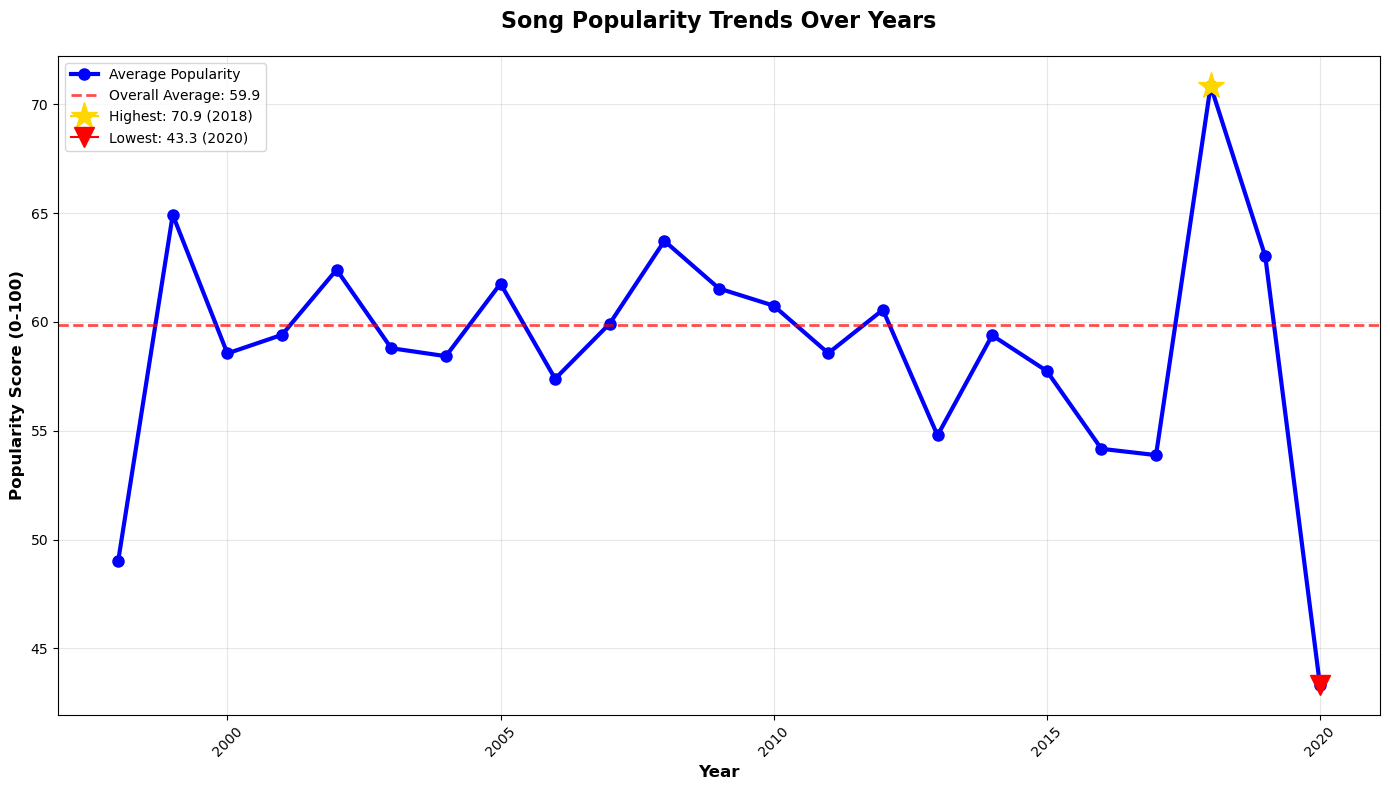

In [6]:
def line_graph(df):
    """
    Enhanced line graph with average points highlighted.
    Shows song popularity trends over years with key insights.
    """
    
    # =========================================================================
    # STEP 1: CALCULATE YEARLY AVERAGES
    # =========================================================================
    # Group by year and calculate mean popularity
    yearly_avg = df.groupby('year')['popularity'].mean().sort_index()
    
    # Calculate overall average for reference line
    overall_avg = df['popularity'].mean()
    
    # =========================================================================
    # STEP 2: IDENTIFY KEY DATA POINTS
    # =========================================================================
    # Find years with highest and lowest popularity
    max_year = yearly_avg.idxmax()
    min_year = yearly_avg.idxmin()
    
    # =========================================================================
    # STEP 3: CREATE THE LINE GRAPH
    # =========================================================================
    plt.figure(figsize=(14, 8))
    
    # Plot main trend line
    plt.plot(
        yearly_avg.index,
        yearly_avg.values,
        marker='o',
        linewidth=3,
        color='blue',
        label='Average Popularity',
        markersize=8
    )
    
    # =========================================================================
    # STEP 4: ADD REFERENCE LINES AND MARKERS
    # =========================================================================
    # Add overall average line
    plt.axhline(
        y=overall_avg, 
        color='red', 
        linestyle='--', 
        linewidth=2,
        label=f'Overall Average: {overall_avg:.1f}',
        alpha=0.7
    )
    
    # Highlight highest point with star marker
    plt.plot(
        max_year,
        yearly_avg[max_year],
        marker='*',
        markersize=20,
        color='gold',
        label=f'Highest: {yearly_avg[max_year]:.1f} ({max_year})'
    )
    
    # Highlight lowest point with triangle marker  
    plt.plot(
        min_year,
        yearly_avg[min_year],
        marker='v',
        markersize=15,
        color='red',
        label=f'Lowest: {yearly_avg[min_year]:.1f} ({min_year})'
    )
    
    # =========================================================================
    # STEP 5: ADD CHART LABELS AND TITLES
    # =========================================================================
    plt.title('Song Popularity Trends Over Years', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel('Popularity Score (0-100)', fontsize=12, fontweight='bold')
    
    # =========================================================================
    # STEP 6: ADD VISUAL ENHANCEMENTS
    # =========================================================================
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best', fontsize=10)
    plt.xticks(rotation=45)
    
    # =========================================================================
    # STEP 7: FINALIZE AND DISPLAY
    # =========================================================================
    plt.tight_layout()
    plt.show()


# =============================================================================
#  EXECUTE THE FUNCTION
# =============================================================================
line_graph(df)

C:\Users\marag\AppData\Local\Temp\ipykernel_18092\2059275318.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


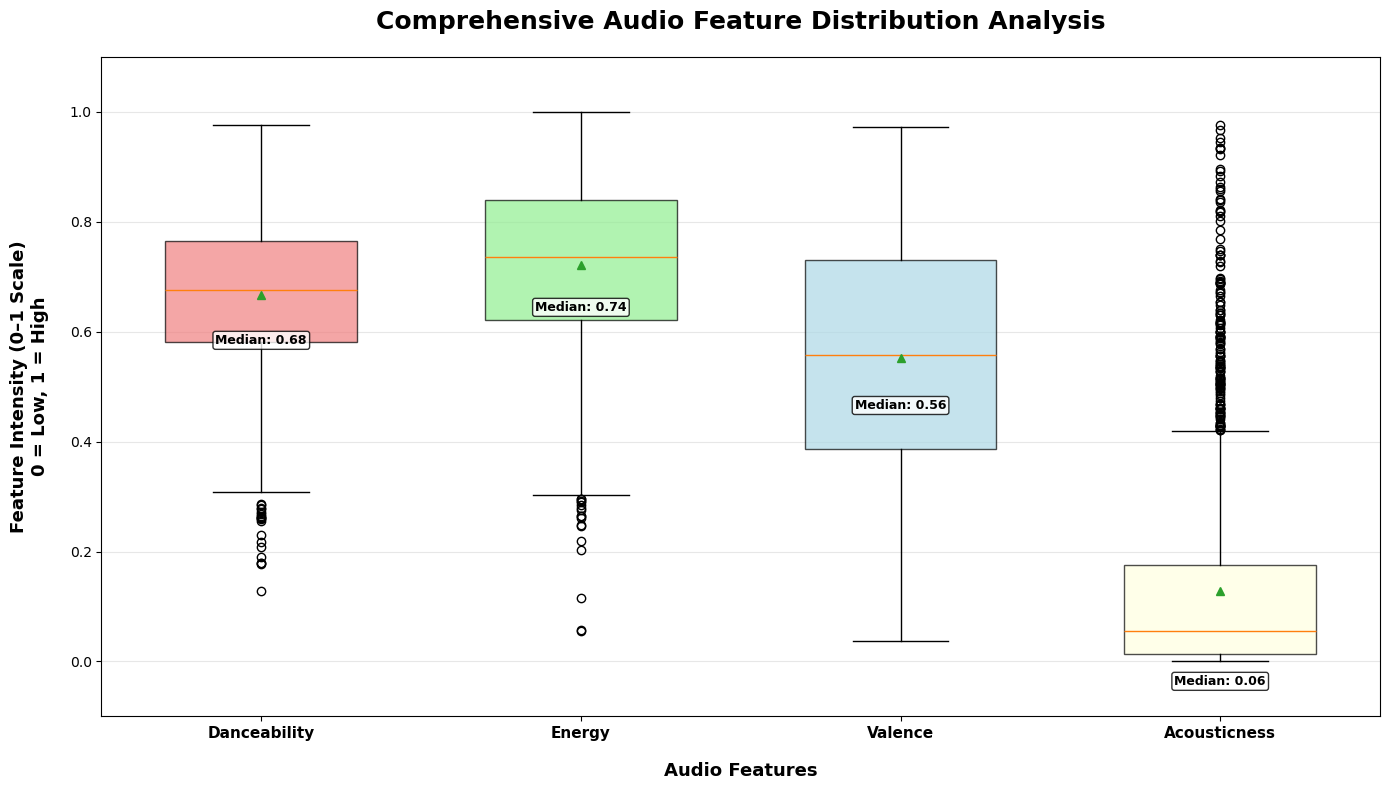

In [7]:
def audio_features_box_plot(df):
    """
    Creates a  box plot comparing main audio features of songs.
    Provides detailed visualization of feature distributions and statistics.
    """

    # =========================================================================
    # STEP 1: DEFINE FEATURES, LABELS, AND COLORS
    # =========================================================================
    # Select core audio features for analysis
    features = ['danceability', 'energy', 'valence', 'acousticness']
    
    # Create human-readable labels for display
    feature_labels = ['Danceability', 'Energy', 'Valence', 'Acousticness']
    
    # Define soft color palette for the boxes
    colors = ['lightcoral', 'lightgreen', 'lightblue', 'lightyellow']

    # =========================================================================
    # STEP 2: DATA PREPARATION
    # =========================================================================
    # Handle any missing values by filling with median
    df_clean = df[features].fillna(df[features].median())

    # =========================================================================
    # STEP 3: CREATE THE BOXPLOT VISUALIZATION
    # =========================================================================
    # Initialize figure with professional dimensions
    plt.figure(figsize=(14, 8))
    
    # Generate boxplot with enhanced styling
    box = plt.boxplot(
        [df_clean[f] for f in features],
        labels=feature_labels,
        patch_artist=True,
        widths=0.6,
        showmeans=True
    )

    # =========================================================================
    # STEP 4: APPLY COLORS AND BASIC STYLING
    # =========================================================================
    # Apply colors to each box
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    # =========================================================================
    # STEP 5: ENHANCE CHART WITH PROFESSIONAL STYLING
    # =========================================================================
    # Main title with clear purpose
    plt.title(
        'Comprehensive Audio Feature Distribution Analysis', 
        fontsize=18, 
        fontweight='bold', 
        pad=20
    )
    
    # Y-axis label with scale context
    plt.ylabel(
        'Feature Intensity (0–1 Scale)\n0 = Low, 1 = High', 
        fontsize=13, 
        fontweight='bold',
        labelpad=15
    )
    
    # X-axis label
    plt.xlabel(
        'Audio Features', 
        fontsize=13, 
        fontweight='bold',
        labelpad=15
    )

    # =========================================================================
    # STEP 6: ADD GRID AND VISUAL GUIDES
    # =========================================================================
    # Add horizontal grid for easier value reading
    plt.grid(axis='y', alpha=0.3)
    
    # Set y-axis limits for consistent scale
    plt.ylim(-0.1, 1.1)
    
    # Customize axis labels
    plt.xticks(rotation=0, fontsize=11, fontweight='bold')
    plt.yticks(fontsize=10)

    # =========================================================================
    # STEP 7: ADD MEDIAN VALUE ANNOTATIONS
    # =========================================================================
    # Display median values on the plot
    for i, feature in enumerate(features):
        feature_data = df_clean[feature]
        median_val = feature_data.median()
        
        # Add text annotation for median values
        plt.text(
            i + 1, median_val - 0.08, f'Median: {median_val:.2f}',
            ha='center', va='top', fontsize=9, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8)
        )

    # =========================================================================
    # STEP 8: FINAL CHART POLISHING AND DISPLAY
    # =========================================================================
    # Adjust layout to prevent element clipping
    plt.tight_layout()
    
    # Display the finalized visualization
    plt.show()


# =============================================================================
# EXECUTE THE  FUNCTION
# =============================================================================
audio_features_box_plot(df)

C:\Users\marag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\marag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\marag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\marag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window


 GROUPING ERROR RESULTS:
------------------------------
   1 groups: 8,000
   2 groups: 6,005
   3 groups: 4,761
   4 groups: 4,191
   5 groups: 3,739
   6 groups: 3,455
   7 groups: 3,204
   8 groups: 2,949


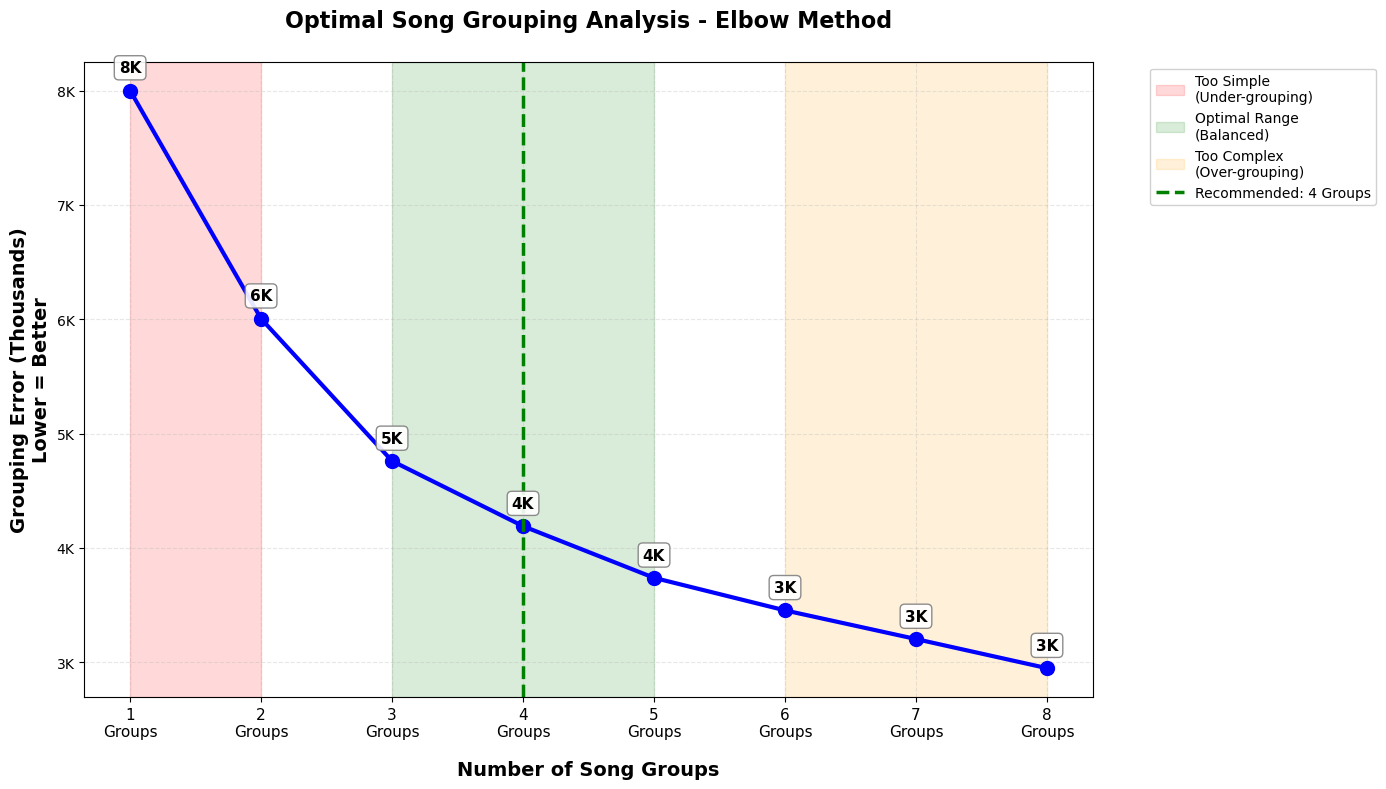

In [41]:
def elbow_plot():
    """
    Main function to perform K-means clustering analysis for songs.
    
    """
    # =========================================================================
    # STEP 1: SELECT MUSICAL FEATURES FOR GROUPING
    # =========================================================================
    features = ['danceability', 'energy', 'tempo', 'valence']
    
    # =========================================================================
    # STEP 2: DATA PREPARATION AND CLEANING
    # =========================================================================
    # Handle missing values by filling with mean
    X = df[features].fillna(df[features].mean())
    
    # Standardize features to equal importance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # =========================================================================
    # STEP 3: TEST DIFFERENT CLUSTER CONFIGURATIONS
    # =========================================================================
    group_options = range(1, 9)
    grouping_errors = []
    
    for num_groups in group_options:
        # Create KMeans model with current group count

        model = KMeans(n_clusters=num_groups, random_state=42, n_init=5)
        
        # Train model on scaled data
        model.fit(X_scaled)
        
        # Store inertia (grouping error) for evaluation
        grouping_errors.append(model.inertia_)
    
    # =========================================================================
    # STEP 4: DISPLAY RAW PERFORMANCE METRICS
    # =========================================================================
    print("\n GROUPING ERROR RESULTS:")
    print("-" * 30)
    for groups, error in zip(group_options, grouping_errors):
        print(f"   {groups} groups: {error:,.0f}")
    
    # =========================================================================
    # STEP 5: CREATE ELBOW METHOD VISUALIZATION
    # =========================================================================
    plt.figure(figsize=(14, 8))
    
    # Plot main elbow curve
    plt.plot(
        group_options, grouping_errors, 'bo-', linewidth=3, markersize=10
    )
    
    # =========================================================================
    # STEP 6: ENHANCE PLOT WITH PROFESSIONAL STYLING
    # =========================================================================
    # Configure axes and labels
    plt.xlabel('Number of Song Groups', fontsize=14, fontweight='bold', labelpad=15)
    
    # Dynamic y-axis formatting based on scale
    if max(grouping_errors) > 5000:
        plt.ylabel('Grouping Error (Thousands)\nLower = Better', fontsize=14, fontweight='bold')
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
    else:
        plt.ylabel('Grouping Error\nLower = Better', fontsize=14, fontweight='bold')
    
    # Professional title
    plt.title('Optimal Song Grouping Analysis - Elbow Method', 
              fontsize=16, fontweight='bold', pad=25)
    
    # Improved x-axis labels
    plt.xticks(group_options, [f'{i}\nGroups' for i in group_options], fontsize=11)
    
    # =========================================================================
    # STEP 7: ADD INTERPRETATION GUIDANCE ZONES
    # =========================================================================
    plt.axvspan(1, 2, alpha=0.15, color='red', label='Too Simple\n(Under-grouping)')
    plt.axvspan(3, 5, alpha=0.15, color='green', label='Optimal Range\n(Balanced)')
    plt.axvspan(6, 8, alpha=0.15, color='orange', label='Too Complex\n(Over-grouping)')
    
    # =========================================================================
    # STEP 8: ANNOTATE WITH EXACT VALUES
    # =========================================================================
    for groups, error in zip(group_options, grouping_errors):
        # Format value based on scale
        label_text = f'{error/1000:.0f}K' if max(grouping_errors) > 5000 else f'{error:.0f}'
        
        # Position value labels above data points
        plt.text(
            groups, error + max(grouping_errors)*0.02, label_text,
            ha='center', fontweight='bold', fontsize=11,
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', 
                     edgecolor='gray', alpha=0.9)
        )
    
    # =========================================================================
    # STEP 9: HIGHLIGHT RECOMMENDED CONFIGURATION
    # =========================================================================
    sweet_spot = 4
    plt.axvline(
        x=sweet_spot, color='green', linestyle='--', linewidth=2.5,
        label=f'Recommended: {sweet_spot} Groups'
    )
    
    # =========================================================================
    # STEP 10: FINAL PLOT POLISHING
    # =========================================================================
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=0.9)
    plt.tight_layout()
    
    # Display the complete visualization
    plt.show()
    
# =============================================================================
# EXECUTE the Function
# =============================================================================
elbow_plot()

LINEAR REGRESSION RESULTS
R-squared (R²) Score: 0.0083
Root Mean Squared Error (RMSE): 21.80


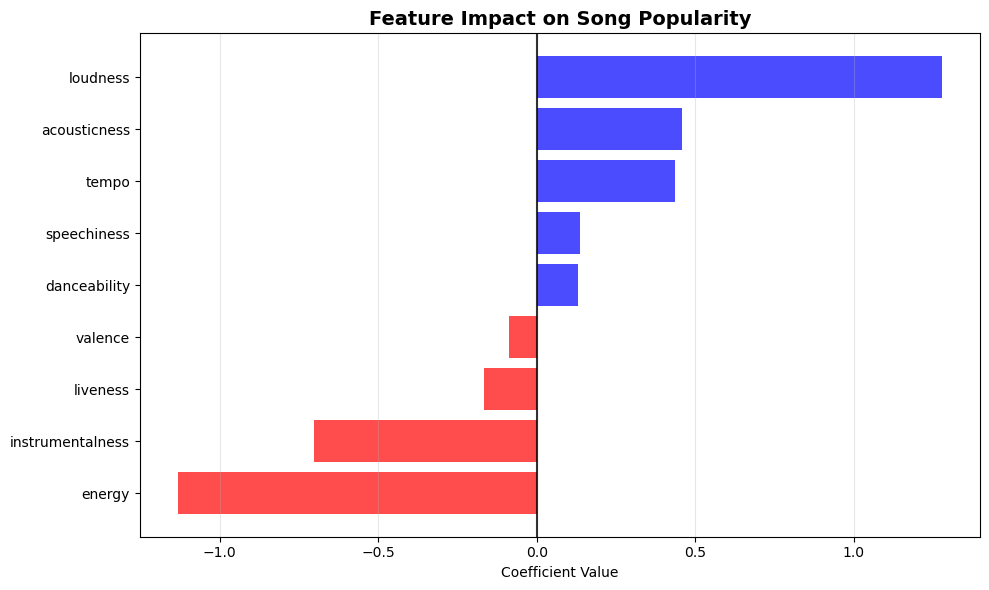


FEATURE IMPACT ANALYSIS:
• Blue bars = Increase popularity
• Red bars = Decrease popularity
• Longer bars = Stronger influence


In [15]:
def linear_regression_main(df):
    """
    Run full linear regression workflow
    """
    
    # ============================================================================
    # 1. SELECT FEATURES AND TARGET
    # ============================================================================
    feature_columns = [     
        'danceability',     
        'energy',          
        'loudness',         
        'speechiness',      
        'acousticness',     
        'instrumentalness', 
        'liveness',         
        'valence',          
        'tempo'            
    ]
    target_column = 'popularity'  # What we're trying to predict (0-100 scale)
    
    # Split data into features (X) and target (y)
    X = df[feature_columns]  # All our predictor variables
    y = df[target_column]    # The variable we want to predict
    
    # ============================================================================
    # 2. SPLIT DATA INTO TRAINING AND TEST SETS
    # ============================================================================
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # ============================================================================
    # 3. FEATURE SCALING (STANDARDIZATION)
    # ============================================================================
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # ============================================================================
    # 4. TRAIN LINEAR REGRESSION MODEL
    # ============================================================================
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # ============================================================================
    # 5. MAKE PREDICTIONS AND EVALUATE MODEL
    # ============================================================================
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Print model performance
    print("LINEAR REGRESSION RESULTS")
    print("=" * 30)
    print(f"R-squared (R²) Score: {r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    
    # ============================================================================
    # 6. VISUALIZE FEATURE IMPORTANCE ONLY
    # ============================================================================
    plt.figure(figsize=(10, 6))
    
    # Feature Coefficients Plot
    coefficients = pd.DataFrame({
        'Feature': feature_columns,
        'Coefficient': model.coef_
    }).sort_values('Coefficient', ascending=True)
    
    colors = ['red' if c < 0 else 'blue' for c in coefficients['Coefficient']]
    plt.barh(coefficients['Feature'], coefficients['Coefficient'],
             color=colors, alpha=0.7)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.8)
    plt.xlabel('Coefficient Value')
    plt.title('Feature Impact on Song Popularity', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    # ============================================================================
    # 7. INTERPRETATION GUIDE
    # ============================================================================
    print("\n" + "=" * 50)
    print("FEATURE IMPACT ANALYSIS:")
    print("=" * 50)
    print("• Blue bars = Increase popularity")
    print("• Red bars = Decrease popularity") 
    print("• Longer bars = Stronger influence")
# ============================================================================
# EXECUTE the Function
# ============================================================================
linear_regression_main(df)

C:\Users\marag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Cluster sizes:
  Cluster 1: 427 songs (21.3%)
  Cluster 2: 684 songs (34.2%)
  Cluster 3: 857 songs (42.9%)
  Cluster 4: 32 songs (1.6%)


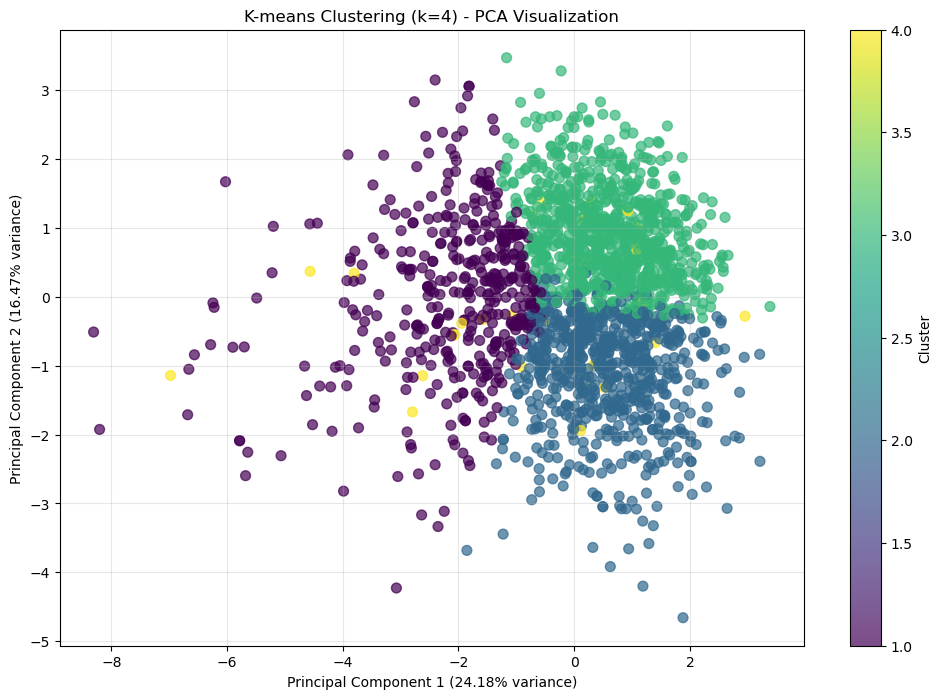


INSIGHTS FOR EDUCATIONAL USE
• Cluster 3 stands out as the most balanced and populous — ideal for teaching general trends.
• Cluster 2 offers contrast with its acoustic and instrumental focus — great for genre comparison.
• Cluster 1 is perfect for illustrating high-energy music clustering.
• Cluster 4 introduces variability with speech-heavy or live elements — useful for edge cases.


In [39]:
def perform_kmeans_clustering():
    """
    Perform K-means clustering on song data and visualize results.
    """
    
    # =============================================================================
    # STEP 1: DATA LOADING AND PREPARATION
    # =============================================================================
    # Load the data
    df = pd.read_csv('SongDetails.csv')
    
    # Select relevant audio features for clustering
    audio_features = [
        'danceability', 'energy', 'loudness', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
    ]
    
    # =============================================================================
    # STEP 2: FEATURE EXTRACTION AND PREPROCESSING
    # =============================================================================
    # Extract features and handle missing values
    X = df[audio_features].dropna()
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # =============================================================================
    # STEP 3: K-MEANS CLUSTERING
    # =============================================================================
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    
    # Add cluster labels to dataframe (starting from 1 instead of 0)
    df_clustered = df.copy().loc[X.index]
    df_clustered['cluster'] = clusters + 1  # Convert 0-based to 1-based indexing
    
    # =============================================================================
    # STEP 4: CLUSTER SIZE ANALYSIS
    # =============================================================================
    # Display cluster sizes
    print("Cluster sizes:")
    cluster_sizes = df_clustered['cluster'].value_counts().sort_index()
    for cluster_id, size in cluster_sizes.items():
        percentage = (size / len(df_clustered)) * 100
        print(f"  Cluster {cluster_id}: {size} songs ({percentage:.1f}%)")
    
    # =============================================================================
    # STEP 5: PCA VISUALIZATION
    # =============================================================================
    # PCA scatter plot
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        X_pca[:, 0], 
        X_pca[:, 1], 
        c=clusters + 1,  # Convert 0-based to 1-based for coloring
        cmap='viridis', 
        alpha=0.7, 
        s=50
    )
    plt.colorbar(scatter, label='Cluster')
    plt.title('K-means Clustering (k=4) - PCA Visualization')
    plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # =============================================================================
    # INSIGHTS FOR EDUCATIONAL USE
    # =============================================================================
    print("\n" + "="*70)
    print("INSIGHTS FOR EDUCATIONAL USE")
    print("="*70)
    print("• Cluster 3 stands out as the most balanced and populous — ideal for teaching general trends.")
    print("• Cluster 2 offers contrast with its acoustic and instrumental focus — great for genre comparison.")
    print("• Cluster 1 is perfect for illustrating high-energy music clustering.")
    print("• Cluster 4 introduces variability with speech-heavy or live elements — useful for edge cases.")


# =============================================================================
# EXECUTE THE FUNCTION
# =============================================================================
perform_kmeans_clustering()